# Лабораторная работа 1, ПМИ 2023/24, I курс, M+, дискретная математика.

Это небольшой ознакомительный туториал по библиотеке [NetworkX](https://networkx.org). Каждая задача оценивается в $2.5$ балла, за №3 и №4 можно получить по одному дополнительному. Таким образом, за выполнение этого ноутбука можно получить до $12$ баллов.

При решении задач можно и __нужно__ использовать любую функциональность библиотеки NetworkX. Однако использование сторонних библиотек, кроме NetworkX и matplotlib, запрещено.

Удачи!

## №0. Играемся с NetworkX ($0$ баллов)

NetworkX — это библиотека для работы с графами и базирующихся на них структурами. У библиотеки есть замечательная документация и оффициальные туториалы на [сайте библиотеки](networkx.org), не забывайте заглядывать в них при выполнении лабораторной работы.

Наш основной подопытный в этом ноутбуке — класс [`Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html), предназначенный для работы с неориентированными графами без кратных ребер. Вершинами графов могут быть любые хешируемые объекты, кроме `None`. С каждой вершиной и ребром также ассоциирован словарь произвольных атрибутов.

In [1]:
# не забываем импортировать библиотеку
import networkx as nx

In [3]:
G = nx.Graph()  # создаем пустой граф

G.add_nodes_from(range(10))  # добавляем в граф вершины: числа от 0 до 9
G.add_nodes_from(["odd", "even"])  # добавляем еще две вершины-строки

for int_node in range(10):
    # добавляем ребра, которые хранят какую-то информацию
    G.add_edge(int_node, "odd" if int_node % 2 == 1 else "even", quotient=int_node // 2)

print(G)

# G.nodes — список вершин графа
# обратите внимание, что это не питоновский список, а специальный прокси-объект
# в частности, при обращении к G.nodes ничего не копируется
print(f"{G.nodes = }")

# G.edges — список ребер
# Как и в случае в вершинами, G.nodes — это прокси-объект

# По умолчанию edges представляет только набор ребер
print(f"{G.edges = }")

# Можно указать, чтобы edges еще показывал хранимые в ребрах данные
print(f"{G.edges(data=True) = }")

# Можно попросить только ребра, инцидентные какой-то вершине
print(f"{G.edges(nbunch='odd') = }")

# См. также: Graph.degree, Graph.adj

Graph with 12 nodes and 10 edges
G.nodes = NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'odd', 'even'))
G.edges = EdgeView([(0, 'even'), (1, 'odd'), (2, 'even'), (3, 'odd'), (4, 'even'), (5, 'odd'), (6, 'even'), (7, 'odd'), (8, 'even'), (9, 'odd')])
G.edges(data=True) = EdgeDataView([(0, 'even', {'quotient': 0}), (1, 'odd', {'quotient': 0}), (2, 'even', {'quotient': 1}), (3, 'odd', {'quotient': 1}), (4, 'even', {'quotient': 2}), (5, 'odd', {'quotient': 2}), (6, 'even', {'quotient': 3}), (7, 'odd', {'quotient': 3}), (8, 'even', {'quotient': 4}), (9, 'odd', {'quotient': 4})])
G.edges(nbunch='odd') = EdgeDataView([('odd', 1), ('odd', 3), ('odd', 5), ('odd', 7), ('odd', 9)])


Смотреть на графы в текстовом виде, конечно, не очень удобно. NetworkX предоставляет базовые функции для визуализации графов c matplotlib под капотом. Для продвинутой визуализации существуют отдельные пакеты, например Graphviz, однако в этой лабораторной мы не будем их использовать.

(-1.1260000000000001, 0.32599999999999996, -0.5445, 0.5445)

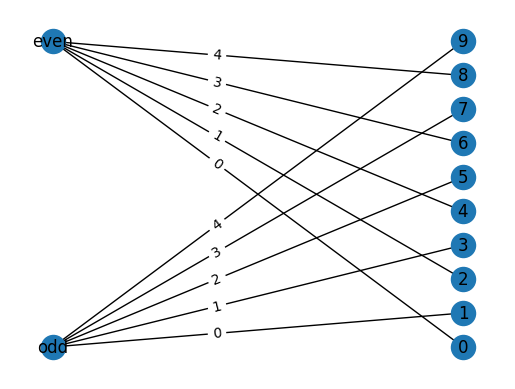

In [4]:
import matplotlib.pyplot as plt

# layout задает расположение вершин на картинке
# есть несколько встроенных генераторов layout-ов, но можно и задавать их вручную
layout = nx.bipartite_layout(G, ["odd", "even"])

# рисуем граф в соответствии с заданным layout-ом
# по умолчанию draw_networkx отображает вершины и ребра без данных
nx.draw_networkx(G, layout)

# отдельный метод отображает данные в ребрах
# обратите внимание, что layout должен быть один и тот же: иначе всё поедет
nx.draw_networkx_edge_labels(G, pos=layout, label_pos=0.4,
                             edge_labels=nx.get_edge_attributes(G, "quotient"))

plt.axis("off")

## №1. Выращивание деревьев ($2.5$ балла)

Итак, каждый уважающий себя студент ПМИ должен посадить дерево. Как вы помните, деревом называется связный простой граф без циклов.

Научимся генерировать деревья. Воспользуемся следующей идеей: сгенерируем список `degrees` степеней вершин, а по нему построим дерево.

*Задание*: напишите функцию `generate_tree`, которая принимает на вход массив `degrees` (который можно менять), и возвращает `nx.Graph` — дерево в вершинами `0`, `1`, ..., `len(degrees) - 1`, где степень вершины `i` равна `degrees[i]`, либо `None`, если дерева с таким набором степеней не существует. Обоснуйте корректность алгоритма.

In [6]:
def generate_tree(degrees: list[int]) -> nx.Graph | None:
    n = len(degrees)
    edges = 0
    for i in range(n):
        if degrees[i] == 0:
            return None
        edges += degrees[i]
    if edges != 2 * (n - 1):
        return None
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if n == 2:
        G.add_edge(0, 1)
        return G
    not_leaves = []
    for i in range(n):
        if degrees[i] > 1:
            if len(not_leaves) > 0:
                G.add_edge(not_leaves[-1], i)
            not_leaves.append(i)
    ind = 0
    for i in range(n):
        if degrees[i] == 1:
            G.add_edge(not_leaves[ind], i)
            while ind < len(not_leaves) and G.degree[not_leaves[ind]] == degrees[not_leaves[ind]]:
                ind += 1
    return G

In [7]:
assert generate_tree([1, 1, 1]) is None
assert generate_tree([0, 1, 1]) is None
assert dict(generate_tree((degrees := [4, 3, 2] + [1] * 5).copy()).degree) \
    == dict(enumerate(degrees))

*Обоснование*: ясно, что для связности степень каждой вершины хотя бы 1 и для дерева количество ребер *n* - 1 (то есть сумма степеней это *2 * (n - 1)*); далее я строю бамбук из вершин, степень которых хотя бы 2, а потом навешиваю листы на вершины (сначала на первую до упора, потом на следующую, и так далее); ясно, что алгоритм корректен, так как в бамбуке у всех степень хотя бы *2*, поэтому там "переполнения" реберного нет, а количество листов с недостающими оставшимися степенями сходится просто потому что количество ребер *(n-1)*.

Теперь, используя написанную функцию и модуль `random`, сгенерируйте и визуализируйте построенное дерево. Выделите цветом листовые вершины.

*Hint*: `nx.spring_layout` выглядит красиво :)

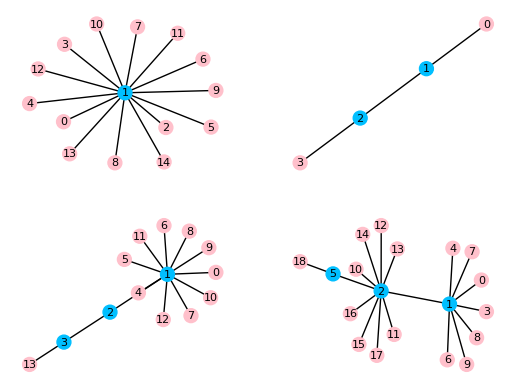

In [8]:
import random

def random_tree() -> nx.Graph:
    n = random.randint(2, 20)
    degrees = [0] * n
    edges_left = 2 * (n - 1)
    for i in range(1, n):
        degrees[i] = random.randint(1, edges_left - (n - i))
        edges_left -= degrees[i]
    degrees[0] = edges_left
    return generate_tree(degrees)

for i in range(4):
    plt.subplot(221 + i)
    tree = random_tree()
    node_colormap = []
    for node in tree:
        if tree.degree[node] > 1:
            node_colormap.append("#00bfff")
        else:
            node_colormap.append("#ffc0cb")
    layout = nx.spring_layout(tree)
    nx.draw(tree, pos=layout, node_color=node_colormap, with_labels=True, node_size=100, font_size=8)

plt.show()

## №2. Забота о дереве ($2.5$ балла)
Дерево нужно не только посадить, но и вырастить. Для этого за ним нужно ухаживать: укорачивать  ветви.

*Ветвью* в дереве называется простой путь, соединяющий две вершины степени отличной от двух (то есть листья и вершины степени больше 2), в котором все промежуточные вершины имеют степень 2. Другими словами, ветвью называется связный фрагмент дерева, не содержащий ветвления. В этом задании мы хотим *стянуть* все ветви в данном дереве в ребра, то есть каждую ветвь заменить на ребро.

*Задание*: напишите функцию `construct_branch_tree`, которое принимает на вход дерево `tree`, стягивает в нем ветви и возвращает измененное дерево (сам граф копировать не нужно).

In [9]:
def construct_branch_tree(tree: nx.Graph) -> nx.Graph:
    delete = []
    for node in tree.nodes:
        if tree.degree[node] == 2:
            delete.append(node)
    for node in delete:
        tree.add_edge(list(tree.adj[node])[0], list(tree.adj[node])[1])
        tree.remove_node(node)
    return tree

Визуализируйте результат работы функции: постройте изображение исходного дерева, в котором выделите вершины степени $2$, и изображение полученного дерева. Используя `layout`, сделайте так, чтобы на картинках "до" и "после" вершины со степенями, не отличными от $2$, были на одинаковых местах.

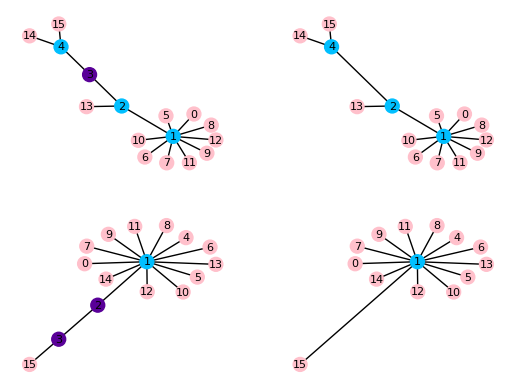

In [12]:
for i in range(2):
    tree = random_tree()
    layout = nx.spring_layout(tree)

    node_colormap_for_tree = []
    for node in tree:
        if tree.degree[node] > 2:
            node_colormap_for_tree.append("#00bfff")
        elif tree.degree[node] == 2:
            node_colormap_for_tree.append("#590098")
        else:
            node_colormap_for_tree.append("#ffc0cb")
    plt.subplot(221 + i * 2)
    nx.draw(tree, pos=layout, node_color=node_colormap_for_tree, with_labels=True, node_size=100, font_size=8)
    cutted_tree = construct_branch_tree(tree)
    node_colormap_for_cutted_tree = []
    for node in cutted_tree:
        if tree.degree[node] > 2:
            node_colormap_for_cutted_tree.append("#00bfff")
        else:
            node_colormap_for_cutted_tree.append("#ffc0cb")
    plt.subplot(221 + 2 * i + 1)
    nx.draw(cutted_tree, pos=layout, node_color=node_colormap_for_cutted_tree, with_labels=True, node_size=100, font_size=8)

plt.show()

## №3. Путешествие ($2.5 + 1$ баллa)
Итак, вы посадили дерево. Однако растет оно долго, и в свободное от ухода за ним (и, конечно же, учебы) время вы решили отправится в путешествие.

Ваше путешествие зключается в том, чтобы обойти все ребра некоторого графа. Времени у вас, однако, не слишком много, и проходить по ребрам по несколько раз вы не хотите. Напомним, что путь в графе, который проходит по всем ребрам по одному разу, называется *эйлеровым*, а сам граф называется *полуэйлеровым*, если в нем есть эйлеров путь.

*Задание*: напишите функцию `generate_semieuler`, которая возвращает какой-нибудь ориентированный полуэйлеров граф на $n$ вершинах с $m$ ребрами, у которого нет двунаправленных ребер, либо `None`, если такого графа не существует. Обоснуйте корректность алгоритма.

In [13]:
def generate_semieuler(n: int, m: int) -> nx.Graph | None:
    if m < n - 1 or (m > n * (n - 1) // 2 - 1 and n % 2 == 1) or (m > n * (n - 2) // 2 + 1 and n % 2 == 0):
        return None # будем запрещать несвязные графы и кратность (тогда максимум когда все четные кроме двух откуда и оценка снизу)
    semieuler = nx.DiGraph()
    semieuler.add_nodes_from(range(n))
    full_g = nx.Graph()
    full_g.add_nodes_from(range(n))
    if n % 2 == 0: # максимальный граф это полный без паросочетания с ребром
        for i in range(n):
            f = i + 1
            if i % 2 == 0 and i > 0:
                f = i + 2
            for j in range(f, n):
                full_g.add_edge(i, j)
    else: # максимальный граф это полный
        for i in range(n):
            for j in range(i + 1, n):
                full_g.add_edge(i, j)
    euler_path = list(nx.eulerian_path(full_g))
    euler_path = euler_path[:m]
    id = 1
    ends = dict()
    for (v, u) in euler_path:
        if id == 1:
            ends[v] = "begin"
        if id == m:
            ends[u] = "end"
        semieuler.add_edge(v, u, index=id - 1)
        id += 1
    nx.set_node_attributes(semieuler, ends, "ends")
    return semieuler

In [17]:
assert generate_semieuler(6, 14) is None
assert generate_semieuler(7, 20)

*Обоснование*: я строю эйлеров путь в графе с максимальным эйлеровым путем, а далее просто беру префикс пути нужной длины. В случае нечетного n максимальный эйлеров граф - это полный граф (все степени четны), значит без одного ребера (так как больше ребер добавить нельзя) будет максимальный путь. В случае четного, максимальный эйлеров граф это полный граф без паросочетания (то есть -1 ребро у каждой вершины, чтоб степень четная была), с одним ребром (между любыми двумя, это будет начало и конец) это максимальный эйлеров путь. (Ясно из что из любого эйлерова пути можно выкинуть/добавить ребро между началом и концом, поэтому максимальная длина эйлерова пути не более чем на один больше максимального эйлерова цикла). Сам эйлеров путь строю с помощью функции в библиотеке networkx

Визуализируйте полученный граф и эйлеров путь в нем: отметьте концы пути и раскрасьте ребра таким образом, чтобы цвет плавно менялся вдоль пути.

*Дополнительный балл*: за красивую (по мнению проверяющего) визуализацию можно получить дополнительный балл.

In [ ]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
def hex_to_rgb(hex):
    return [float(int(hex[i:i+2], 16)) / 255 for i in range(1,6,2)]
def gradient(s, f, n):
  s = hex_to_rgb(s)
  f = hex_to_rgb(f)
  res = [s]
  for d in range(1, n):
    color = [(s[j] + (float(d) / (n - 1)) * (f[j] - s[j])) for j in range(3)]
    res.append(color)
  return res

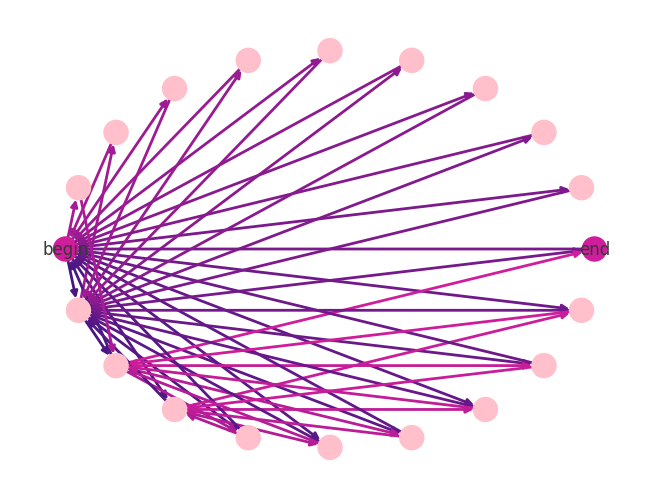

In [ ]:
n = 20
m = 50
G = generate_semieuler(n, m)
edge_colors = gradient("#461783", "#D01D9B", m)
node_colors = ["#ffc0cb"] * n
ends = nx.get_node_attributes(G, "ends")
for i in range(n):
    if i in ends and ends[i] == "begin":
        node_colors[i] = "#D01D9B"
    elif i in ends and ends[i] == "end":
        node_colors[i] = "#D01D9B"
edge_colors_path = []
ids = nx.get_edge_attributes(G, "index")
for edge in G.edges():
    edge_colors_path.append(edge_colors[ids[edge]])
layout = nx.shell_layout(G)
nx.draw(G, pos=layout, node_color=node_colors, edge_color=edge_colors_path, with_labels=True, labels=ends, font_color="#363737", width=2.)

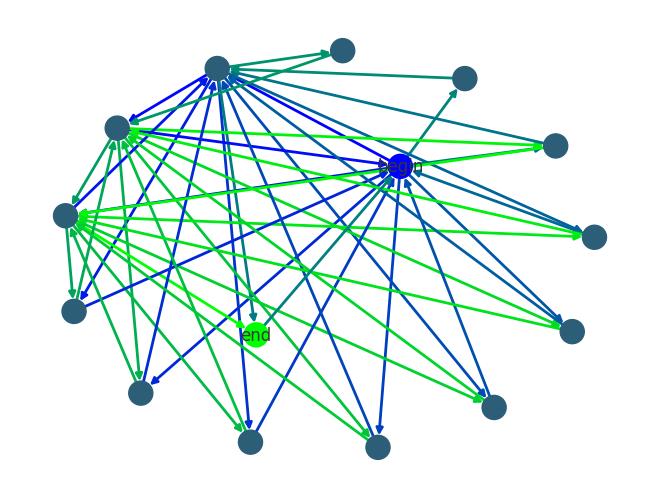

In [ ]:
n = 15
m = 45
G = generate_semieuler(n, m)
edge_colors = gradient("#0000ff", "#00ff00", m)
node_colors = ["#2d5e78"] * n
ends = nx.get_node_attributes(G, "ends")
level_list = [[], []]
for i in range(n):
    if i in ends and ends[i] == "begin":
        node_colors[i] = "#0000ff"
        level_list[0].append(i)
    elif i in ends and ends[i] == "end":
        node_colors[i] = "#00ff00"
        level_list[0].append(i)
    else:
        level_list[1].append(i)
edge_colors_path = []
ids = nx.get_edge_attributes(G, "index")
for edge in G.edges():
    edge_colors_path.append(edge_colors[ids[edge]])
layout = nx.shell_layout(G, nlist=level_list, rotate=1)
nx.draw(G, pos=layout, node_color=node_colors, edge_color=edge_colors_path, with_labels=True, labels=ends, font_color="#363737", width=2.)

## №4. Нужно больше красок! ($2.5 + 1$ баллa)
Вернувшись из путешествия, вы решили заняться строительством и покраской дома.

Так уж вышло, что ваш дом — это простой граф, где комнаты — это вершины. Чтобы дом не казался скучным, вы решили покрасить его так, чтобы у смежных вершин цвета были разными. Однако слишком много цветов вы тоже не хотите: все-таки краску покупать дешевле оптом. Поэтому раскраска должна быть минимальной.

Для проектирования дома вы наняли архитектора Мычельского. Изначально вы хотели сделать ваш дом в форме посаженного ранее дерева, однако г-н Мычельский указал на то, что тогда для покраски комнат хватит всего двух цветов, и предложил взять мычельскиан вашего дерева, причем в несколько итераций: т.е. взять мычельскиан мычельскиана ... мычельскиана вашего дерева. Вы согласились, и теперь вам придется придумать, как покрасить комнаты.

*Задание*: напишите функцию `mycielskian_coloring`, которая принимает на вход дерево `tree` c вершинами `0`, `1`, ..., `len(tree.nodes) - 1` и количество итераций `iterations`, и возвращает граф, получаемый взятием мычельскиана от `tree` `iterations` раз, в каждой вершине которого храниться целочисленный аттрибут `color`, задающий минимальную правильную раскраску на полученном графе.

In [ ]:
def color_tree(tree: nx.Graph) -> nx.Graph:
    st = []
    color = dict()
    for node in tree.nodes():
        color[node] = 0
    st.append(list(tree.nodes())[0])
    clr = 1
    while len(st) > 0:
        v = st[-1]
        if color[v] != 0:
            clr = 3 - clr
            st.pop()
            continue
        color[v] = clr
        clr = 3 - clr
        for u in tree.adj[v]:
            if color[u] == 0:
                st.append(u)
    nx.set_node_attributes(tree, color, name="color")
    return tree

In [ ]:
def mycielskian_coloring(tree: nx.Graph, iterations: int) -> nx.Graph:
    tree = color_tree(tree)
    c = 2
    for i in range(iterations):
        n = len(tree.nodes())
        e = list(tree.edges())
        clrs = nx.get_node_attributes(tree, "color")
        for j in range(n, 2 * n):
            tree.add_node(j, color=clrs[j - n])
        tree.add_node(2 * n, color=c+1)
        c += 1
        for edge in e:
            tree.add_edge(edge[0] + n, edge[1])
            tree.add_edge(edge[0], edge[1] + n)
        for j in range(n, 2 * n):
            tree.add_edge(j, 2 * n)
    return tree

In [ ]:
G = mycielskian_coloring(random_tree(), iters := 3)
assert all(G.nodes[v]['color'] != G.nodes[u]['color'] for u, v in G.edges)

Используя написанную функцию, визуализируйте полученый граф `G` и его минимальную правильную раскраску.

*Дополнительный балл*: за красивую (по мнению проверяющего) визуализацию можно получить дополнительный балл.

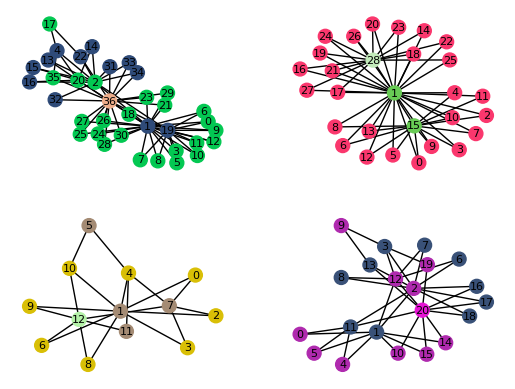

In [ ]:
for i in range(4):
    plt.subplot(221 + i)
    tree = random_tree()
    G = mycielskian_coloring(random_tree(), iters := 1)
    n = len(G.nodes())
    colors = nx.get_node_attributes(G, "color")
    c = 0
    for node in G.nodes():
        c = max(c, colors[node])
    clrs = [0] * (c + 1)
    for i in range(1, c + 1):
        clrs[i] = "#%06x" % random.randint(0, 0xFFFFFF)
    color_map = []
    for node in G:
        color_map.append(clrs[colors[node]])

    layout = nx.spring_layout(G)
    nx.draw(G, pos=layout, with_labels=True, node_color=color_map, node_size=100, font_size=8)

plt.show()

In [ ]:
def edges_between_colors(g: nx.Graph, colors: dict) -> dict:
    edges = dict()
    for (v, u) in g.edges():
        v_color = colors[v]
        u_color = colors[u]
        if v_color > u_color:
            v_color, u_color = u_color, v_color
        if v_color != u_color:
            if (v_color, u_color) in edges:
                edges[(v_color, u_color)] += 1
            else:
                edges[(v_color, u_color)] = 0
    return edges

def colors_pos(g: nx.Graph, colors: dict, sc) -> dict:
    between_colors_edges = edges_between_colors(g, colors)
    colors_set = set(colors.values())
    colors_graph = nx.DiGraph()
    colors_graph.add_nodes_from(colors_set)
    for (c1, c2), cnt in between_colors_edges.items():
        colors_graph.add_edge(c1, c1, weight=cnt)
    pos_colors = nx.spring_layout(colors_graph, scale=sc)
    pos = dict()
    for node, color in colors.items():
        pos[node] = pos_colors[color]
    return pos

def nodes_pos(g: nx.Graph, colors: dict) -> dict:
    colors_nodes = dict()
    for node, color in colors.items():
        if color in colors_nodes:
            colors_nodes[color] += [node]
        else:
            colors_nodes[color] = [node]
    pos = dict()
    for color, nodes in colors_nodes.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph)
        pos.update(pos_subgraph)
    return pos

def color_layout(g: nx.Graph, colors: dict) -> dict:
    pos_colors = colors_pos(g, colors, 2.0)
    pos_nodes = nodes_pos(g, colors)
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_colors[node] + pos_nodes[node]
    return pos



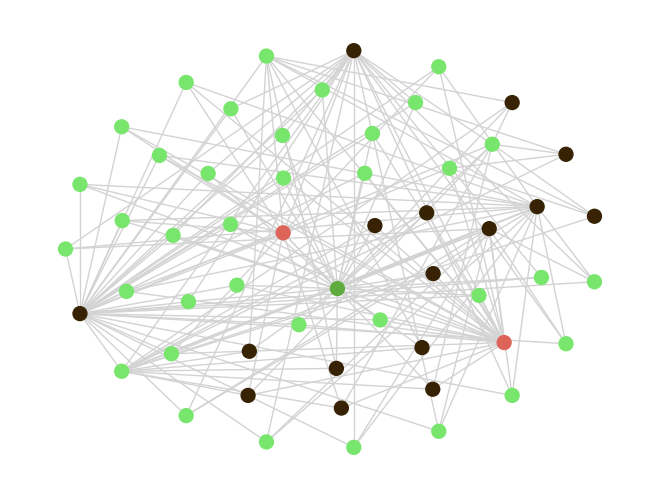

In [ ]:
G = mycielskian_coloring(random_tree(), iters := 2)
n = len(G.nodes())
colors = nx.get_node_attributes(G, "color")
c = 0
for node in G.nodes():
    c = max(c, colors[node])
clrs = [0] * (c + 1)
for i in range(1, c + 1):
    clrs[i] = "#%06x" % random.randint(0, 0xFFFFFF)
color_map = []
for node in G:
    color_map.append(clrs[colors[node]])

levels = 5
level_list = []
ind = 0
for i in range(levels):
    vertexes = []
    for j in range(ind, n - n * (levels - i) * (levels - i - 1) // 2 // ((levels + 1) * levels // 2)):
        vertexes.append(j)
    level_list.append(vertexes)
    ind = n - n * (levels - i) * (levels - i - 1) // 2 // ((levels + 1) * levels // 2)
level_list.reverse()
layout = nx.shell_layout(G, level_list)
nx.draw(G, pos=layout, node_color=color_map, node_size=100, edge_color="#D3D3D3")

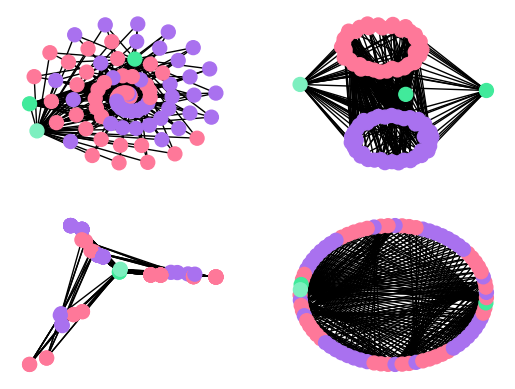

In [ ]:
G = mycielskian_coloring(random_tree(), iters := 2)
n = len(G.nodes())
colors = nx.get_node_attributes(G, "color")
c = 0
for node in G.nodes():
    c = max(c, colors[node])
clrs = [0] * (c + 1)
for i in range(1, c + 1):
    clrs[i] = "#%06x" % random.randint(0, 0xFFFFFF)
color_map = []
for node in G:
    color_map.append(clrs[colors[node]])

plt.subplot(221)
layout = nx.spiral_layout(G)
nx.draw(G, pos=layout, node_color=color_map, node_size=100)

plt.subplot(222)
layout = color_layout(G, colors)
nx.draw(G, pos=layout, node_color=color_map, node_size=100)

plt.subplot(223)
layout = nx.spectral_layout(G)
nx.draw(G, pos=layout, node_color=color_map, node_size=100)

plt.subplot(224)
layout = nx.shell_layout(G)
nx.draw(G, pos=layout, node_color=color_map, node_size=100)